####  Activity-4: Pandas & Visualization

#### Name/Surname: Onur Kaplan
#### Dataset Name:  NBA Players Stats - 2014-2015
#### Dataset url: https://www.kaggle.com/drgilermo/nba-players-stats-20142015

In [1]:
import pandas as pd
veriler = pd.read_csv('players_stats.csv')
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show

#### Problem 1: Total points Per Minute of Teams

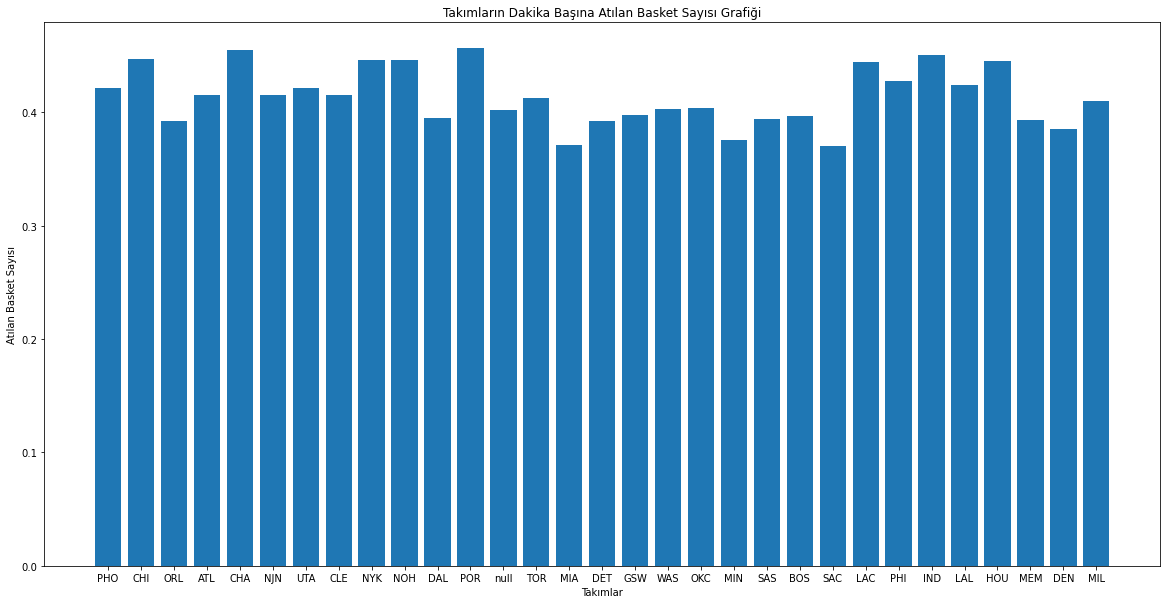

In [186]:
veriler['Team'].fillna("null",inplace=True)
veriler_sum = veriler.groupby('Team').sum()

plt.figure(figsize=(20,10))
plt.bar(veriler['Team'].unique(),(veriler_sum['PTS']/veriler_sum['MIN']))
plt.title("Takımların Dakika Başına Atılan Basket Sayısı Grafiği")
plt.xlabel("Takımlar")
plt.ylabel("Atılan Basket Sayısı")
plt.show()

#### Problem 2: Average points by point guard (PG) players of the teams

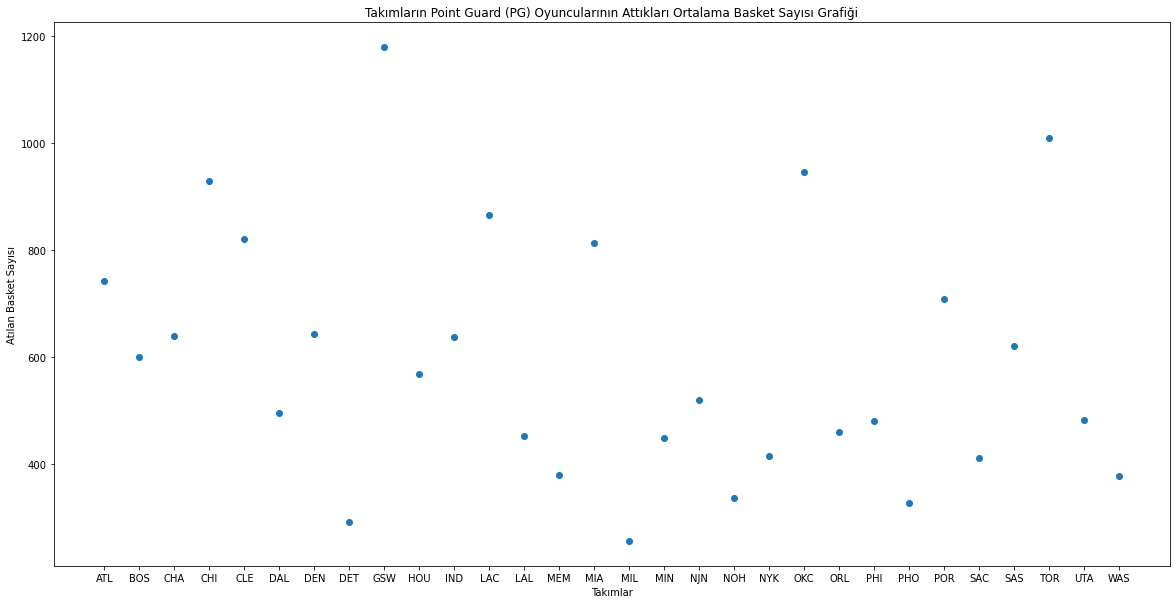

In [245]:
veriler_avg = veriler[(veriler.Pos == 'PG')].groupby('Team').PTS.mean()

veriler_avg = veriler_avg.to_frame()
veriler_avg = veriler_avg.reset_index()
Team = veriler_avg['Team'].tolist()
PTS = veriler_avg['PTS'].tolist()

plt.figure(figsize=(20,10))
plt.scatter(Team,PTS)
plt.title("Takımların Point Guard (PG) Oyuncularının Attıkları Ortalama Basket Sayısı Grafiği")
plt.xlabel("Takımlar")
plt.ylabel("Atılan Basket Sayısı")
plt.show()


#### Problem 3: The names of the top 15 players who score the most 3-point made and the number of 3-point made their score

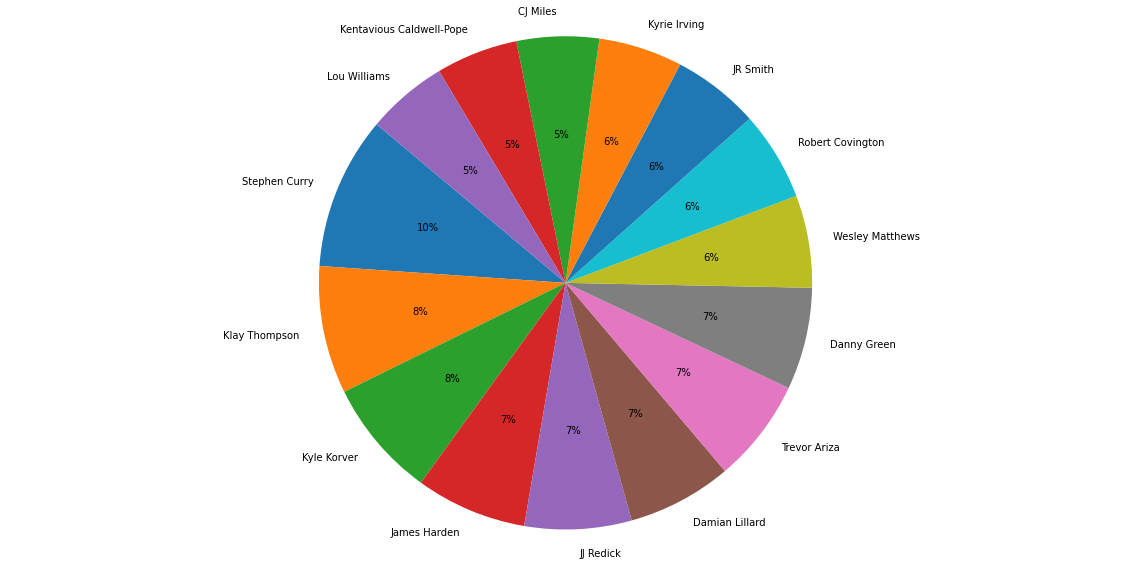

In [244]:
uclukler = veriler[['3PM','Name']].sort_values(by = '3PM',ascending=False).head(15)
plt.figure(figsize=(20,10))
plt.pie(uclukler['3PM'],labels = uclukler['Name'], autopct='%1.0f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

#### Problem 4: Basketball players with a weight between 70 and 75

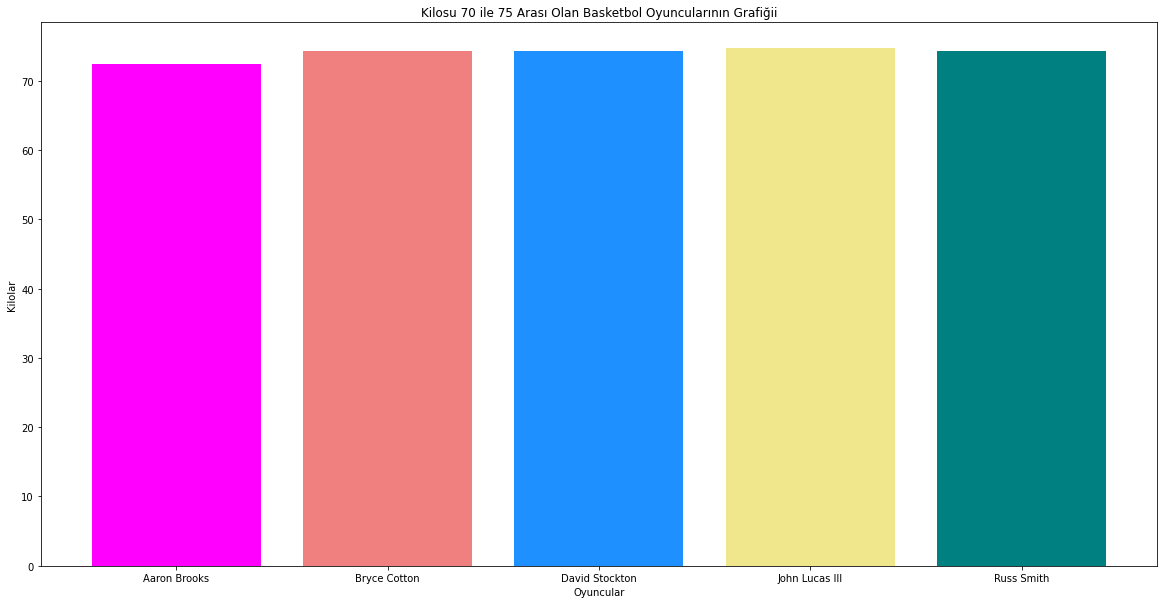

In [293]:
kilolar = veriler[((veriler.Weight < 75)  & (veriler.Weight >70))].groupby('Name').Weight.sum()

kilolar = kilolar.to_frame()
kilolar = kilolar.reset_index()
Weight = kilolar['Weight'].tolist()
Name = kilolar['Name'].tolist()

plt.figure(figsize=(20,10))
plt.bar(Name,Weight,color=['fuchsia','lightcoral','dodgerblue','khaki','teal'])
plt.title("Kilosu 70 ile 75 Arası Olan Basketbol Oyuncularının Grafiğii")
plt.xlabel("Oyuncular")
plt.ylabel("Kilolar")
plt.show()

#### Problem 5: Finding the number of players by roles

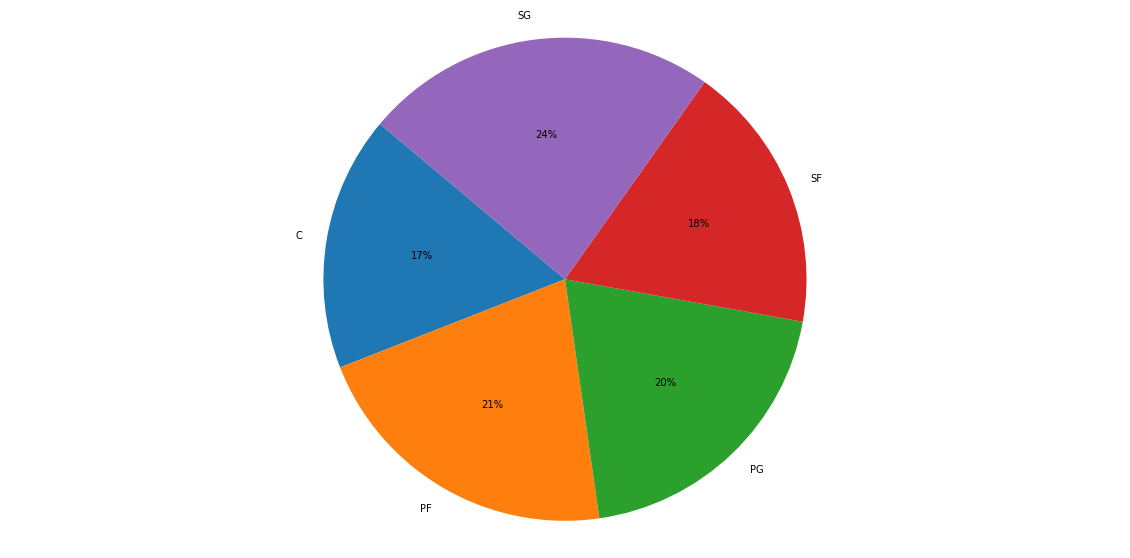

In [288]:
sayi = veriler.groupby('Pos').Name.count()
sayi = sayi.to_frame()
sayi = sayi.reset_index()
Pos = sayi['Pos'].tolist()
Name = sayi['Name'].tolist()

plt.figure(figsize=(20,10))
plt.pie(Name,labels = Pos, autopct='%1.0f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

#### Problem 6:  Graph of the average height of the teams

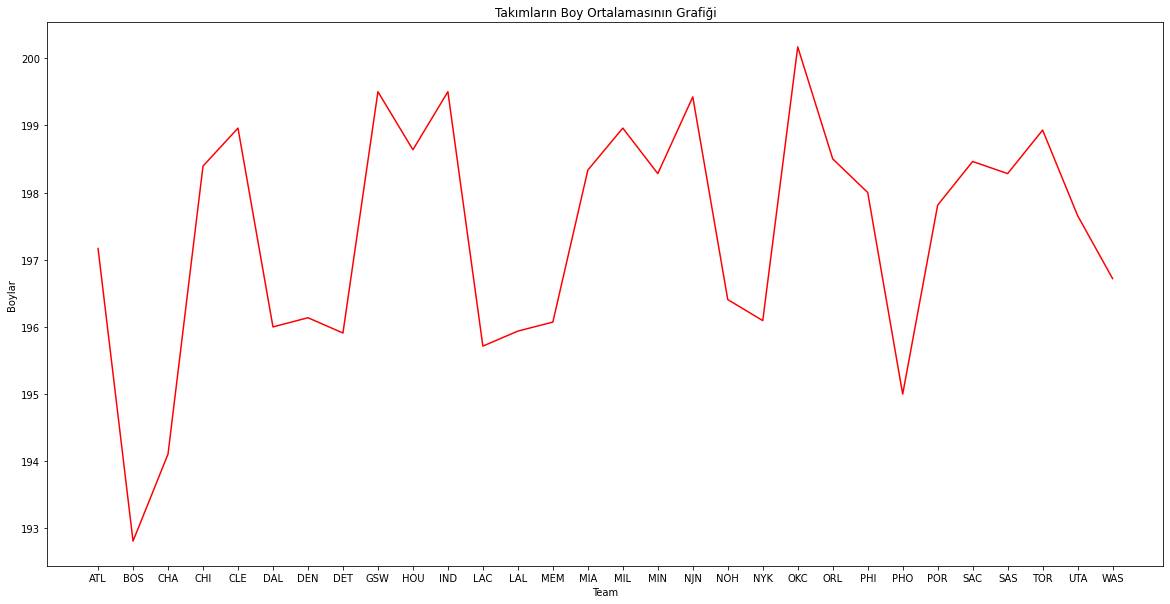

In [16]:
boy = veriler.groupby('Team').Height.mean()
boy = boy.to_frame()
boy = boy.reset_index()
Height = boy['Height'].tolist()
Team = boy['Team'].tolist()

plt.figure(figsize=(20,10))
plt.plot(Team,Height,color = 'red')
plt.title("Takımların Boy Ortalamasının Grafiği")
plt.xlabel("Team")
plt.ylabel("Boylar")
plt.show()

#### Problem 7: The total points, assists, steals made by the top 2 players who played the most basketball games

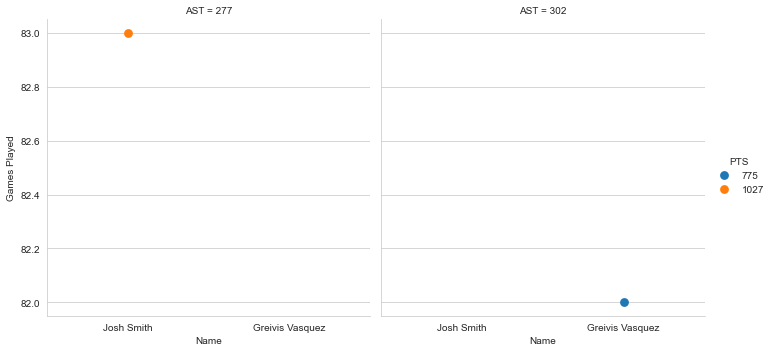

In [5]:
oyuncular = veriler[['Name','Games Played','PTS','AST','STL']].sort_values(by = 'Games Played',ascending=False).head(2)
Name = oyuncular['Name']
GamesPlayed = oyuncular['Games Played']
PTS = oyuncular['PTS']
AST = oyuncular['AST']
sns.set_style('whitegrid')
sns.catplot(x="Name",y="Games Played",col="AST",kind="point",
            data=oyuncular,
            hue = "PTS",
            ci = None,
            edgecolor=None)

#### Problem 8: Number of players by teams

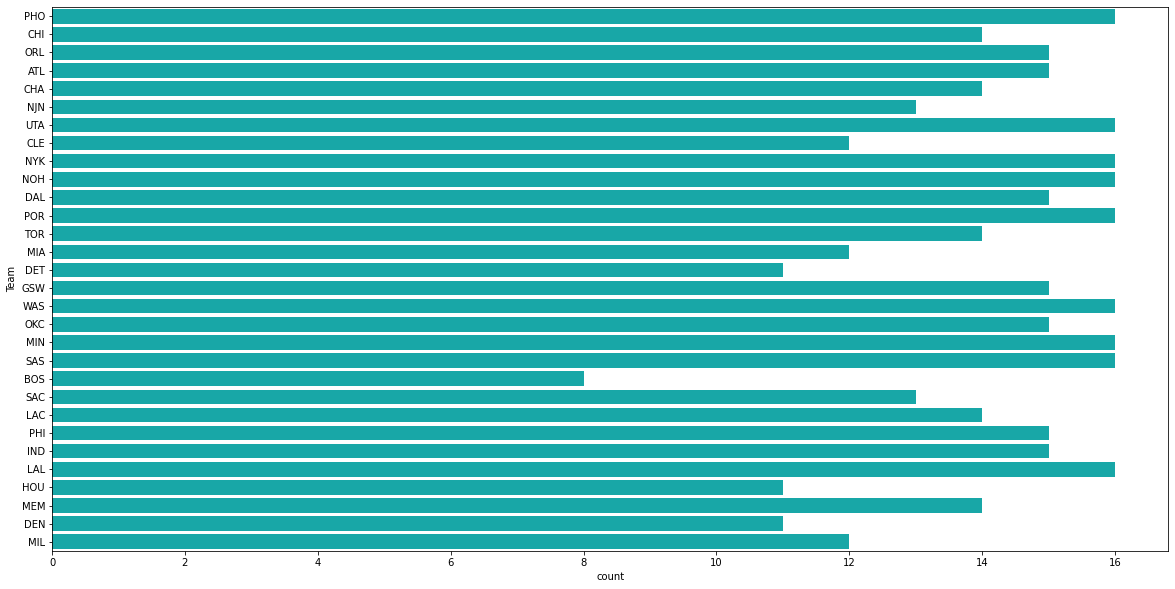

In [4]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y="Team", data=veriler, color="c");

#### Problem 9: Average number of blocks by height

In [73]:
blok = veriler.groupby('Height')['BLK'].mean().to_frame().reset_index()
x = blok['Height'].tolist()
y = blok['BLK'].tolist()

p = figure(title="Boya Göre Ortalama Blok Sayısı", x_axis_label='Height', y_axis_label='Blok')

p.line(x=x, y=y, line_width=4, line_color="orange", line_dash="4 4")

show(p)

#### Problem 10: Assist and block chart

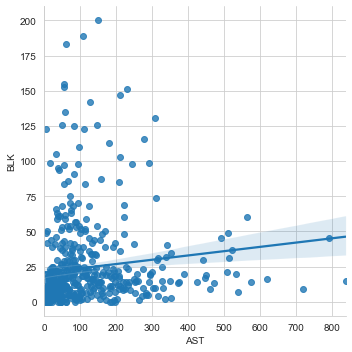

In [8]:
sns.lmplot(x='AST', y='BLK', data=veriler)